In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from scipy.sparse import hstack
import nltk
from wordcloud import WordCloud
import pandas as pd
from sklearn.model_selection import train_test_split
import string
from nltk.corpus import stopwords
from textattack.augmentation import WordNetAugmenter , EmbeddingAugmenter , EasyDataAugmenter , CharSwapAugmenter , CheckListAugmenter
import random
import pandas as pd
import nlpaug.augmenter.word as naw
from tqdm import tqdm

In [2]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
# set palette color
plt.style.use(PLOT_PALETTE)
%matplotlib inline

In [3]:
dataset_1 = pd.read_csv("data/Resume/Resume.csv")
dataset_2 = pd.read_csv("data/Resume/UpdatedResumeDataSet.csv")


In [4]:
dataset_1.rename(columns={'Resume_str':'Resume','Category':'Category'},inplace=True)
dataset_1 =dataset_1[['Resume','Category']]
dataset_2 = dataset_2[['Resume','Category']]


In [5]:
dataset_1['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [6]:
dataset_2['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

# combining similar pieces of information. 
    1. Second dataset also has Sales column. Therefor I have decided to marge them. 
    2. Second dataset also has HR column. Therefor I have decided to marge them. 
    3. Second dataset also has Arts column. Therefor I have decided to marge them. 
    4. Software engineering professionals belong to the IT department, so I have decided to merge software engineers with IT.
    5. Second dataset also has Fitness column. Therefor I have decided to marge them.
    6. Civil engineering professionals belong to the CONSTRUCTION department, so I have decided to merge civil enginners with construction.
    7. Bussiness analytcs professionals and PMO belong to the bussiness development department, so I have decided to merge bussiness analytcs professionals and PMO with bussiness development department.
    8. Second dataset also has Advocate column. Therefor I have decided to marge them.
    9. I have merged  Mechanical Engineer and Electrical Engineering columns with the engineering column. 

In [7]:
#task 1
sales_from_2 =  dataset_2.loc[dataset_2['Category'] =='Sales']
sales_from_2['Category'] = sales_from_2.Category.replace('Sales', 'SALES')
# task 2 
HR_from_2 =  dataset_2.loc[dataset_2['Category'] =='HR']
#task 3
arts_from_2 =  dataset_2.loc[dataset_2['Category'] =='Arts']
arts_from_2['Category'] = arts_from_2.Category.replace('Arts', 'ARTS')
#task 4 
cs_category =  ['SAP Developer','Java Developer','ETL Developer','DevOps Engineer','Network Security Engineer','Python Developer', 'Web Designing',  'Hadoop', 'Blockchain' , 'Data Science' , 'Database' ,'DotNet Developer','Automation Testing']
replace_with = ['INFORMATION-TECHNOLOGY'] *13
it_from_2 = dataset_2.loc[dataset_2['Category'].isin(cs_category)]
it_from_2['Category'] = it_from_2['Category'].replace(cs_category, replace_with)
it_from_2 = it_from_2.sample(frac = 1)
#task 5 
fitness_from_2 =  dataset_2.loc[dataset_2['Category'] =='Health and fitness']
fitness_from_2['Category'] = fitness_from_2.Category.replace('Health and fitness', 'FITNESS')
#task 6
cons_from_2 = dataset_2.loc[dataset_2['Category']=='Civil Engineer']
cons_from_2['Category'] = cons_from_2['Category'].replace('Civil Engineer','CONSTRUCTION')
cons_from_2 = cons_from_2.sample(frac = 1)
#task 7 
bd_category = ['Business Analyst','PMO','Operations Manager']
bd_from_2 = dataset_2.loc[dataset_2['Category'].isin(bd_category)]
bd_from_2['Category'] = bd_from_2['Category'].replace(bd_category,['BUSINESS-DEVELOPMENT','BUSINESS-DEVELOPMENT','BUSINESS-DEVELOPMENT'])
bd_from_2 = bd_from_2.sample(frac = 1)
#task 8 
advocate_from_2 =  dataset_2.loc[dataset_2['Category'] =='Advocate']
advocate_from_2['Category'] = advocate_from_2.Category.replace('Advocate', 'ADVOCATE')

#task 9
eng_category = ['Mechanical Engineer', 'Electrical Engineering', 'Testing']
eng_from_2 = dataset_2.loc[dataset_2['Category'].isin(eng_category)]
eng_from_2['Category'] = eng_from_2['Category'].replace(eng_category,['ENGINEERING']*3) 
eng_from_2 = eng_from_2.sample(frac = 1)




In [8]:
 dataset = pd.concat([dataset_1,sales_from_2]) #task 1
 dataset = pd.concat([dataset,HR_from_2])   #task 2
 dataset = pd.concat([dataset,arts_from_2]) #task 3
 dataset = pd.concat([dataset,it_from_2.iloc[:50]]) #task 4
 dataset = pd.concat([dataset,fitness_from_2]) #task 5
 dataset = pd.concat([dataset,cons_from_2]) #task 6
 dataset = pd.concat([dataset, bd_from_2.iloc[:40]])
 dataset = pd.concat([dataset, advocate_from_2]) #task 8
 dataset = pd.concat([dataset,eng_from_2.iloc[:45] ]) #task 9

 


In [9]:
category = dataset['Category'].value_counts().reset_index()
category

Category  count
0   INFORMATION-TECHNOLOGY    170
1              ENGINEERING    163
2     BUSINESS-DEVELOPMENT    160
3                    SALES    156
4                       HR    154
5                  FITNESS    147
6                     ARTS    139
7                 ADVOCATE    138
8             CONSTRUCTION    136
9                     CHEF    118
10              ACCOUNTANT    118
11                 FINANCE    118
12                AVIATION    117
13              CONSULTANT    115
14              HEALTHCARE    115
15                 BANKING    115
16        PUBLIC-RELATIONS    111
17                DESIGNER    107
18                 TEACHER    102
19                 APPAREL     97
20           DIGITAL-MEDIA     96
21             AGRICULTURE     63
22              AUTOMOBILE     36
23                     BPO     22

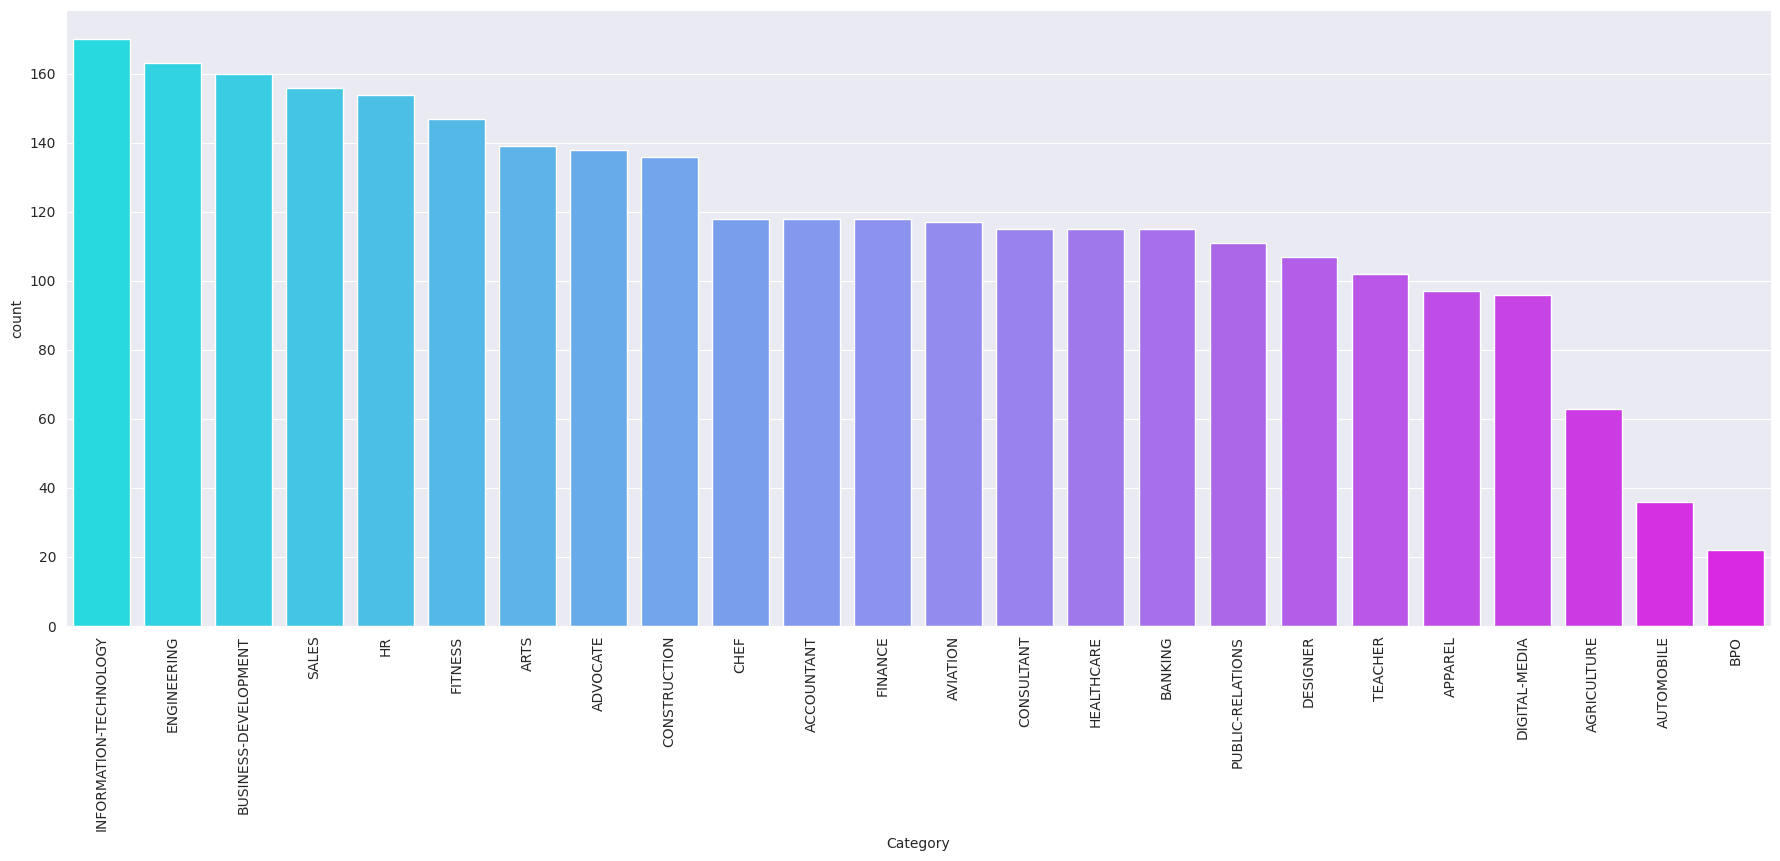

In [10]:
plt.figure(figsize=(22,8))
plt.xticks(rotation=90)
sns.barplot(x=category['Category'], y=category['count'], palette='cool')
plt.show()

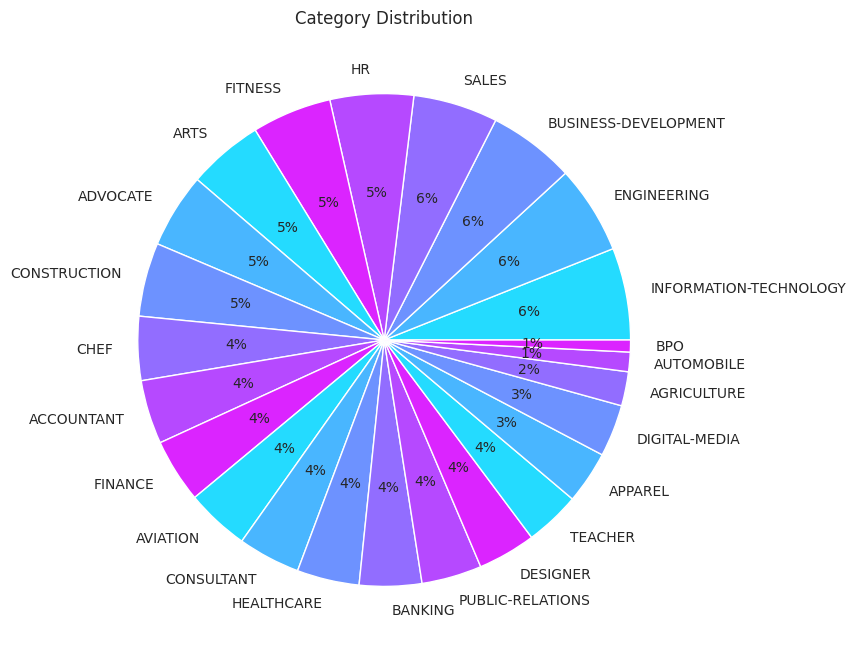

In [11]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=90)
plt.pie(category['count'], labels=category['Category'],
        colors=sns.color_palette('cool'), autopct='%.0f%%')
plt.title('Category Distribution')
plt.show()

In [12]:
import re

# Data Preprocessing

In [13]:
def cleanResume(resumeText):
    resumeText = resumeText.lower()
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub('[^a-zA-Z]', ' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
# def preprocess(txt):
#     # convert all characters in the string to lower case
#     txt = txt.lower()
#     # remove non-english characters, punctuation and numbers
#     txt = re.sub('http\S+\s*', ' ', txt)  # remove URLs
#     txt = re.sub('[^a-zA-Z]', ' ', txt)
#     txt = re.sub('RT|cc', ' ', txt)  # remove RT and cc
#     txt = re.sub('#\S+', '', txt)  # remove hashtags
#     txt = re.sub('@\S+', '  ', txt)  # remove mentions
#     txt = re.sub('\s+', ' ', txt)  # remove extra whitespace
#     # tokenize word
#     txt = nltk.tokenize.word_tokenize(txt)
#     # remove stop words
#     txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]
    

#     return ' '.join(txt)

In [14]:
# preprocessing text
dataset['Resume_clean'] = dataset['Resume'].apply(lambda w: cleanResume(w))

# wordcloud visualization 

In [15]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = dataset['Resume_clean'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

# Remove most common words from each sentence
def remove_common_words(sentence):
    wordfreqdist = nltk.FreqDist(totalWords)
    mostcommon = wordfreqdist.most_common(5)
    words = nltk.word_tokenize(sentence)
    words = [word for word in words if word not in mostcommon]
    return ' '.join(words)


[('company', 16533), ('state', 16259), ('city', 15087), ('management', 12834), ('name', 11820), ('sales', 8846), ('business', 8234), ('customer', 8215), ('skills', 8099), ('team', 6760), ('new', 6644), ('service', 6338), ('project', 6284), ('development', 6074), ('training', 5875), ('experience', 5804), ('work', 5253), ('manager', 4840), ('marketing', 4644), ('information', 4627), ('office', 4411), ('education', 4392), ('financial', 4283), ('support', 4264), ('including', 4142), ('data', 4135), ('staff', 4085), ('system', 4027), ('professional', 3895), ('university', 3768), ('process', 3695), ('systems', 3655), ('client', 3643), ('quality', 3614), ('design', 3576), ('customers', 3570), ('managed', 3458), ('clients', 3412), ('operations', 3346), ('reports', 3322), ('developed', 3301), ('analysis', 3152), ('services', 3115), ('high', 3105), ('product', 3026), ('program', 3004), ('microsoft', 2900), ('ounting', 2867), ('responsible', 2850), ('ounts', 2833)]


In [16]:
# Apply the function to the 'Resume_clean' column
# dataset['Resume_clean'] = dataset['Resume_clean'].apply(remove_common_words)


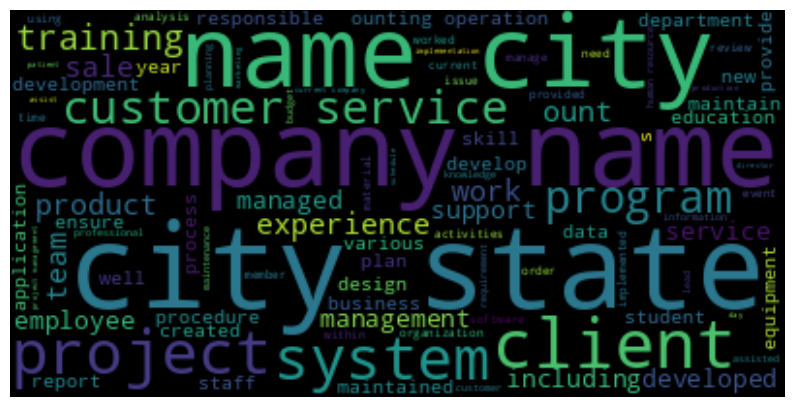

In [17]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resume_clean'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

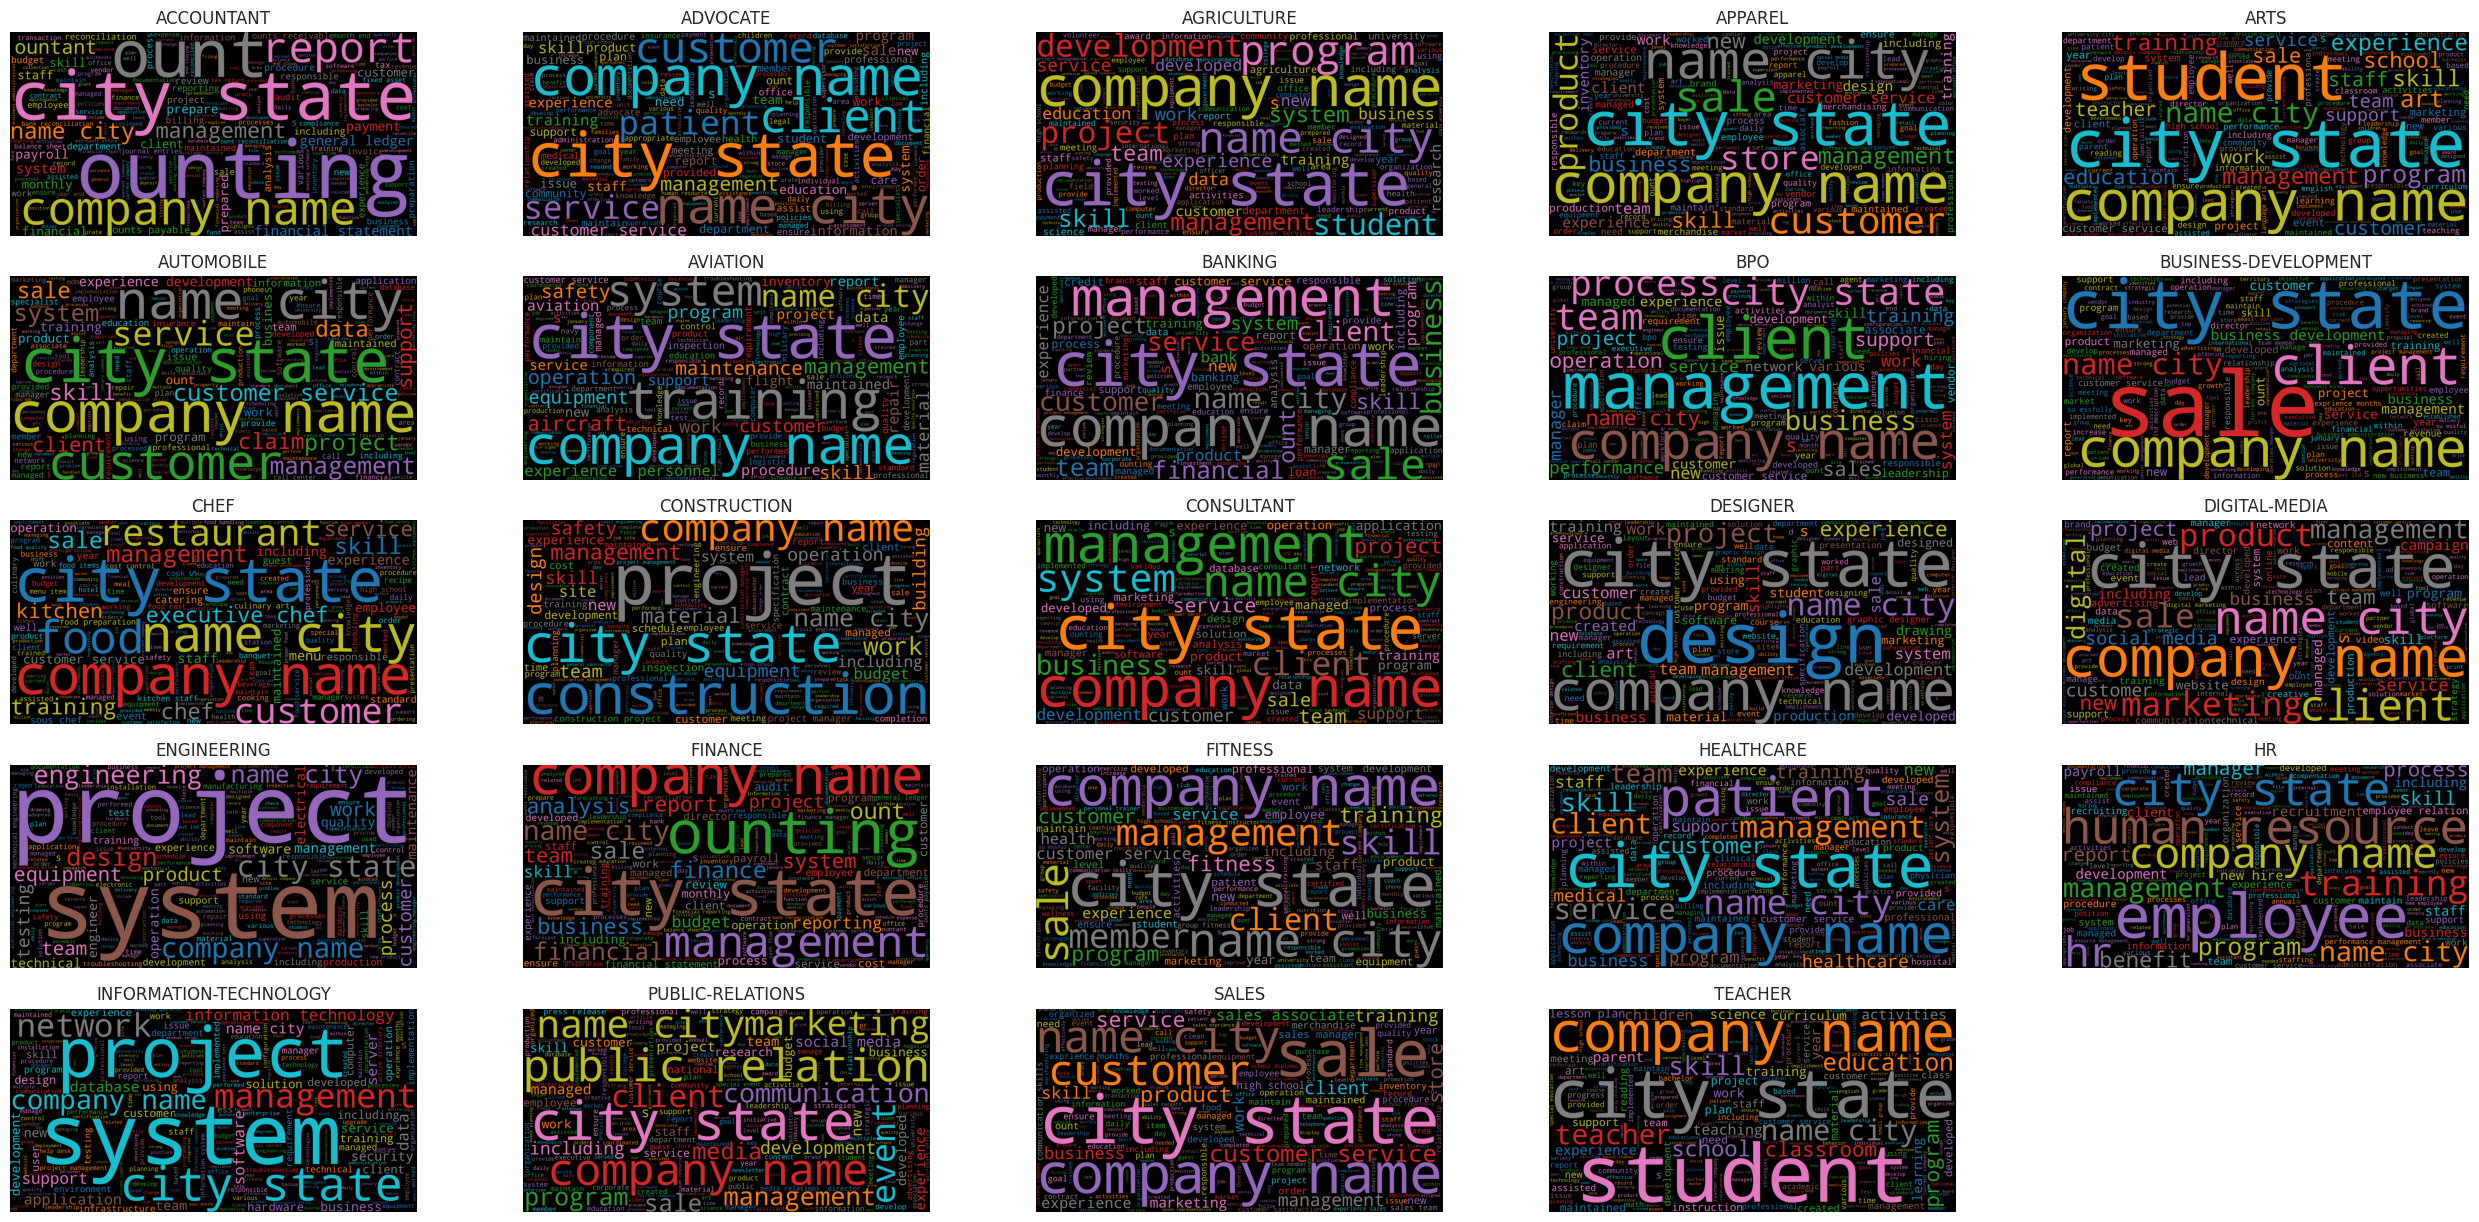

In [19]:
plt.figure(figsize=(32, 28))
# create list of all categories
categories = np.sort(dataset['Category'].unique())
df_categories = [dataset[dataset['Category'] == category].loc[:, ['Resume_clean', 'Category']] for category in categories]

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(9, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [20]:
# Split the data into train and temporary (val+test) sets
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42, stratify=dataset['Category'])

# Print the sizes of each split
print("Train size:", len(train_data))
print("Test size:", len(test_data))

Train size: 2250
Test size: 563


In [21]:
train_data.reset_index(drop= True, inplace = True)
test_data.reset_index(drop= True, inplace = True)


# Data augmentation 

Here all classes are imbalanced. Therefore I have decided to apply data augmentation. 

In [22]:
# Initialize augmentation techniques
augmenter_synonym = naw.SynonymAug(aug_src='wordnet')
augmenter_antonym = naw.AntonymAug()
augmenter_swap = naw.RandomWordAug(action="swap")
augmenter_delete = naw.RandomWordAug(action="delete")

def random_augmantation(text):

    random_number = random.randint(0, 3)
    if random_number == 0:
        aug_text = augmenter_synonym.augment(text)
    if random_number == 1:
        aug_text = augmenter_antonym.augment(text)
    if random_number == 2:
        aug_text = augmenter_swap.augment(text)

    if random_number == 3:
        aug_text = augmenter_delete.augment(text)
    return aug_text


In [23]:
labels = train_data.Category.unique()
resume = []
category = []
for label in tqdm(labels):
    length = len(train_data[train_data['Category']==label])
    loop_range = 150 - length
    df = train_data[train_data['Category']==label]
    for _ in range(loop_range):
        df = df.sample(frac = 1)
        text = df.iloc[0]['Resume_clean']
        aug_text = random_augmantation(text)[0]
        resume.append(aug_text)
        category.append(label)



100%|██████████| 24/24 [00:11<00:00,  2.08it/s]


In [24]:
aug_df = pd.DataFrame({"Resume_clean":resume,"Category":category})
aug_train_data = pd.concat([train_data,aug_df])

In [25]:
aug_train_data.Category.value_counts()

Category
AGRICULTURE               150
BUSINESS-DEVELOPMENT      150
BPO                       150
TEACHER                   150
CONSULTANT                150
AVIATION                  150
HR                        150
INFORMATION-TECHNOLOGY    150
DESIGNER                  150
BANKING                   150
ADVOCATE                  150
FINANCE                   150
ARTS                      150
PUBLIC-RELATIONS          150
ACCOUNTANT                150
CONSTRUCTION              150
DIGITAL-MEDIA             150
FITNESS                   150
CHEF                      150
HEALTHCARE                150
ENGINEERING               150
SALES                     150
APPAREL                   150
AUTOMOBILE                150
Name: count, dtype: int64

In [26]:
train_data.to_csv('data/dataset/train.csv')
aug_train_data.to_csv('data/dataset/train_aug.csv')
test_data.to_csv('data/dataset/test.csv')
